# Combining Gates and Activation Functions


This function shows how to implement various gates with activation functions in TensorFlow.

This function is an extension of the prior gates, but with various activation functions.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/alexia/anaconda2/envs/tf2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [ ]:

tf.random.set_seed(5)
np.random.seed(42)

# Initialize variables
batch_size = 50

x = np.random.normal(2, 0.1, 500)
x_data = tf.keras.Input(shape=(1,))

a1 = tf.Variable(tf.random.normal(shape=[1,1], seed=5))
b1 = tf.Variable(tf.random.uniform(shape=[1,1], seed=5))
a2 = tf.Variable(tf.random.normal(shape=[1,1], seed=5))
b2 = tf.Variable(tf.random.uniform(shape=[1,1], seed=5))


## Create a nested gate: $f(x) = sigmoid(a1 * x + b1)$

```
  a1 --
      |
      |-- (multiply)--
      |               |
  x --                |-- (add) --> (sigmoid) -->output
                      |
                  b1 --
```

In [ ]:
class MyCustomGateSigmoid(tf.keras.layers.Layer):
 
 def __init__(self, units, a1, b1):
   super(MyCustomGateSigmoid, self).__init__()
   self.units = units
   self.a1 = a1
   self.b1 = b1

 # Compute f(x) = sigmoid(a1 * x + b1)
 def call(self, inputs):
   return tf.math.sigmoid(inputs * self.a1 + self.b1)

# Add a layer which computes f(x) = sigmoid(a1 * x + b1)
my_custom_gate_sigmoid = MyCustomGateSigmoid(units=1, a1=a1, b1=b1)
output_sigmoid = my_custom_gate_sigmoid(x_data)

# Build the model
model_sigmoid = tf.keras.Model(inputs=x_data, outputs=output_sigmoid, name="gate_sigmoid")


## Create a nested gate: $f(x) = relu(a2 * x + b2)$

```
  a2 --
      |
      |-- (multiply)--
      |               |
  x --                |-- (add) --> (relu) -->output
                      |
                  b2 --
```

In [ ]:

class MyCustomGateRelu(tf.keras.layers.Layer):
 
 def __init__(self, units, a2, b2):
   super(MyCustomGateRelu, self).__init__()
   self.units = units
   self.a2 = a2
   self.b2 = b2

 # Compute f(x) = relu(a2 * x + b2)
 def call(self, inputs):
   return tf.nn.relu(inputs * self.a2 + self.b2)

# Add a layer which computes f(x) = relu(a2 * x + b2)
my_custom_gate_relu = MyCustomGateRelu(units=1, a2=a2, b2=b2)
outputs_relu = my_custom_gate_relu(x_data)

# Build the model
model_relu = tf.keras.Model(inputs=x_data, outputs=outputs_relu, name="gate_relu")



## Train the two gates with relu and sigmoid activation functions & Compare the results

In [ ]:
# Optimizer
optimizer=tf.keras.optimizers.SGD(0.01)

# Run loop across gate
print('\n Optimizing Sigmoid AND Relu Output to 0.75')
loss_vec_sigmoid = []
loss_vec_relu = []

activation_sigmoid = []
activation_relu = []

for i in range(500):
    
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])
    # Open a GradientTape.
    with tf.GradientTape(persistent=True) as tape:
   
        # Forward pass.
        output_sigmoid = model_sigmoid(x_vals)
        output_relu = model_relu(x_vals)
        
        # Loss value as the difference as the difference between
        # the output and a target value, 0.75.
        loss_sigmoid = tf.reduce_mean(tf.square(tf.subtract(output_sigmoid, 0.75)))
        loss_vec_sigmoid.append(loss_sigmoid)
        loss_relu = tf.reduce_mean(tf.square(tf.subtract(output_relu, 0.75)))
        loss_vec_relu.append(loss_relu)
        
        
    # Get gradients of loss_sigmoid with reference to the variable "a1" and "b1" to adjust.
    gradients_a1 = tape.gradient(loss_sigmoid, my_custom_gate_sigmoid.a1)
    gradients_b1 = tape.gradient(loss_sigmoid , my_custom_gate_sigmoid.b1)
    
    # Get gradients of loss_relu with reference to the variable "a2" and "b2" to adjust.
    gradients_a2 = tape.gradient(loss_relu, my_custom_gate_relu.a2)
    gradients_b2 = tape.gradient(loss_relu , my_custom_gate_relu.b2)
    
    # Update the variable "a1" and "b1" of the model.
    optimizer.apply_gradients(zip([gradients_a1, gradients_b1], [my_custom_gate_sigmoid.a1, my_custom_gate_sigmoid.b1]))
    
    # Update the variable "a2" and "b2" of the model.
    optimizer.apply_gradients(zip([gradients_a2, gradients_b2], [my_custom_gate_relu.a2, my_custom_gate_relu.b2]))
    
    output_sigmoid = model_sigmoid(x_vals)
    output_relu = model_relu(x_vals)
    
    activation_sigmoid.append(np.mean(output_sigmoid))
    activation_relu.append(np.mean(output_relu))
    
    if i%50==0:
        print('sigmoid = ' + str(np.mean(output_sigmoid)) + ' relu = ' + str(np.mean(output_relu)))


 Optimizing Sigmoid AND Relu Output to 0.75

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to 

## Plot the loss

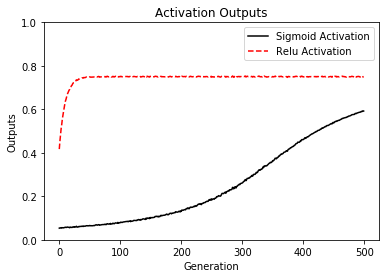

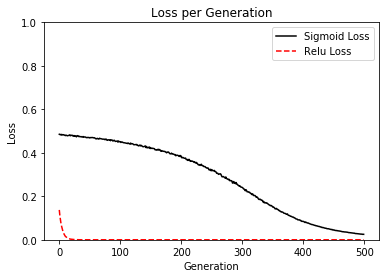

In [ ]:
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation') 
plt.plot(activation_relu, 'r--', label='Relu Activation') 
plt.ylim([0, 1.0]) 
plt.title('Activation Outputs') 
plt.xlabel('Generation') 
plt.ylabel('Outputs') 
plt.legend(loc='upper right') 
plt.show() 
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Loss') 
plt.plot(loss_vec_relu, 'r--', label='Relu Loss') 
plt.ylim([0, 1.0]) 
plt.title('Loss per Generation') 
plt.xlabel('Generation') 
plt.ylabel('Loss') 
plt.legend(loc='upper right') 
plt.show() 
